In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('Salary_dataset.csv')

In [41]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [42]:
df = df.drop('Unnamed: 0', axis=1)


In [43]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [45]:
missing_values = df.isnull().sum()
print(missing_values)


YearsExperience    0
Salary             0
dtype: int64


In [46]:
print(df.dtypes)


YearsExperience    float64
Salary             float64
dtype: object


no categorical columns and missing values handled. 

In [47]:
X = df[['YearsExperience']].values 
Y = df['Salary'].values  # Target variable

In [48]:
print(X.shape)
print(Y.shape)

(30, 1)
(30,)


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

change from here

In [51]:
from sklearn.preprocessing import StandardScaler


In [52]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
X_test_scaled

array([[ 1.5315002 ],
       [-0.09978613],
       [ 1.04558513],
       [ 0.03904675],
       [-0.68982587],
       [-0.51628477]])

In [54]:
X_train_scaled

array([[ 1.77445774],
       [ 1.21912622],
       [-0.41216011],
       [-1.41869849],
       [-1.03690807],
       [-0.03036969],
       [-0.79395053],
       [-0.37745189],
       [-0.41216011],
       [ 0.94146047],
       [-1.34928205],
       [-1.27986561],
       [ 1.32325088],
       [-1.10632451],
       [ 0.66379471],
       [ 1.49679198],
       [ 0.24729607],
       [ 1.84387418],
       [ 0.55967005],
       [-0.68982587],
       [-0.44686833],
       [-0.23861901],
       [ 0.28200429],
       [-0.75924231]])

In [55]:

X_train_scaled.shape

(24, 1)

In [56]:
X_test_scaled.shape

(6, 1)

In [57]:
class linear_regression : 
    def __init__(self, lr = 0.0001, n_iters = 10000):
        self.lr = lr 
        self.n_iters = n_iters
        self.W = None  
        self.b = None
    
    def training_fn(self, x, y ): 

        no_of_samples , no_of_features = x.shape


        #initialising w and b as 0 w as a null vector and b is a forever scaler

        self.W = np.zeros(no_of_features)
        self.b = 0

        for i in range(self.n_iters): 
            y_cap = np.dot(x,self.W)+self.b


            dw = (1/no_of_samples) * np.dot(x.T,(y_cap-y))
            db = (1/no_of_samples) * np.sum(y_cap-y)


            #update parameters

            self.W -= self.lr*dw
            self.b -= self.lr*db

    def predict(self, x): 
            y_cap = np.dot(x,self.W.reshape(-1,1))+self.b
            return y_cap 

In [58]:
model = linear_regression(lr = 0.000001, n_iters = 100000)
model.training_fn(X_train_scaled,Y_train)

In [59]:
coefficients = model.W
bias = model.b

In [60]:
print('coeffecients : ', coefficients)
print('bias: ', bias)

coeffecients :  [2583.81163412]
bias:  7061.887716340483


In [61]:
train_predictions = model.predict(X_train_scaled).flatten()
test_predictions = model.predict(X_test_scaled).flatten()


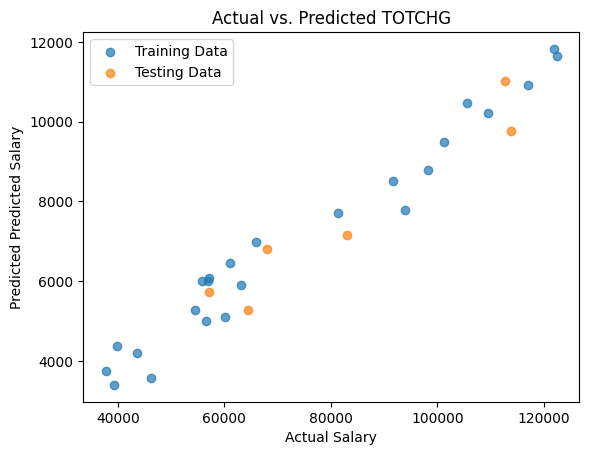

In [62]:
# Scatter plot for training data
plt.scatter(Y_train, train_predictions, label='Training Data', alpha=0.7)
# Scatter plot for testing data
plt.scatter(Y_test, test_predictions, label='Testing Data', alpha=0.7)

plt.xlabel('Actual Salary')
plt.ylabel('Predicted Predicted Salary')
plt.title('Actual vs. Predicted TOTCHG')
plt.legend()
plt.show()